[*********************100%***********************]  3 of 3 completed


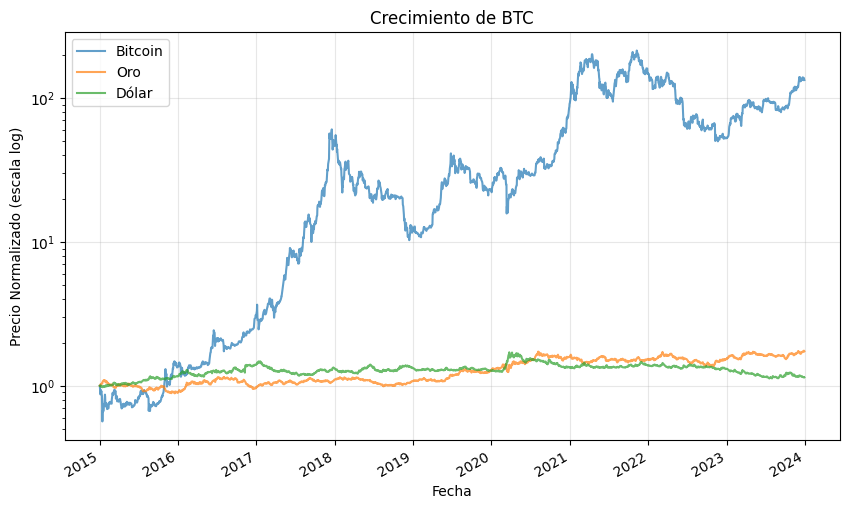

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Descargar los datos en una sola llamada
tickers1 = ['USDMXN=X', 'GC=F', 'BTC-USD']
data1 = yf.download(tickers1, start='2015-01-01', end='2024-01-01')['Close']

# Eliminar filas con valores NaN
data1.dropna(inplace=True)

# Normalizar los datos
data_norm = data1 / data1.iloc[0]

# Graficar los precios normalizados
fig, ax = plt.subplots(figsize=(10, 6))
data_norm.plot(ax=ax, alpha=0.7)

ax.set_title('Crecimiento de BTC')
ax.set_xlabel('Fecha')
ax.set_ylabel('Precio Normalizado (escala log)')
ax.set_yscale('log')
ax.grid(True, alpha=0.3)
ax.legend(['Bitcoin', 'Oro', 'Dólar'])

plt.show()

[*********************100%***********************]  10 of 10 completed


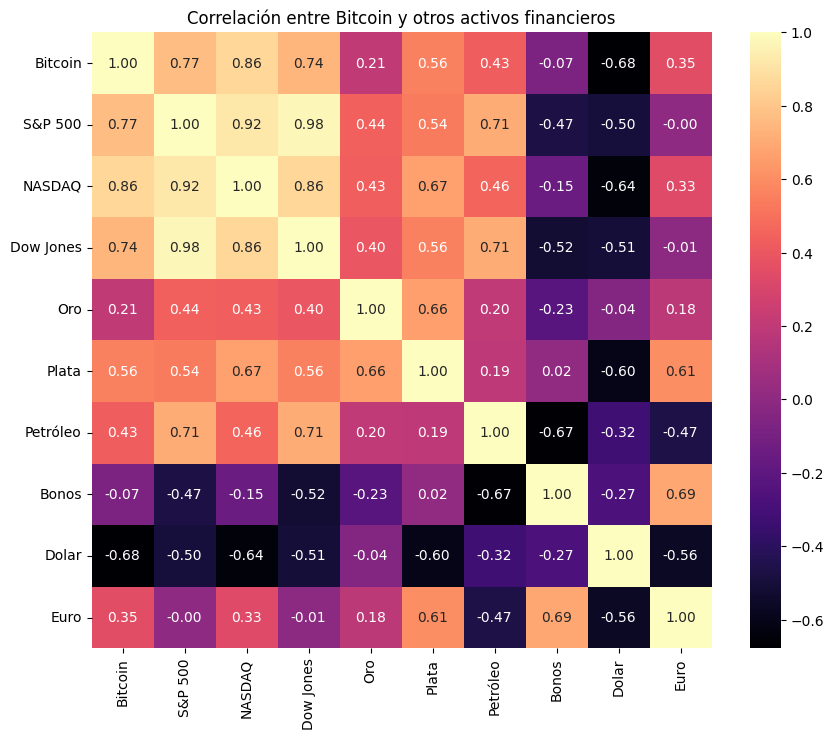

In [2]:
# Definir los tickers de los activos financieros
tickers2 = ['BTC-USD', '^GSPC', '^IXIC', '^DJI', 'GLD', 'SLV', 'CL=F', 'TLT', 'USDCAD=X', 'EURUSD=X']

# Obtener los datos históricos de los activos financieros
data2 = yf.download(tickers2, start="2020-01-01", end="2024-01-01")['Adj Close']

# Crear un DataFrame con los precios de los activos financieros
data2 = pd.DataFrame({
    'Bitcoin': data2['BTC-USD'],
    'S&P 500': data2['^GSPC'],
    'NASDAQ': data2['^IXIC'],
    'Dow Jones': data2['^DJI'],
    'Oro': data2['GLD'],
    'Plata': data2['SLV'],
    'Petróleo': data2['CL=F'],
    'Bonos': data2['TLT'],
    'Dolar': data2['USDCAD=X'],
    'Euro': data2['EURUSD=X']
})

# Calcular la matriz de correlación
correlation_matrix = data2.corr()

# Visualizar la matriz de correlación con Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap='magma', annot=True, fmt='.2f')
plt.title('Correlación entre Bitcoin y otros activos financieros')
plt.show()

In [3]:
btc_correlation = correlation_matrix['Bitcoin']
print(btc_correlation)

Bitcoin      1.000000
S&P 500      0.768964
NASDAQ       0.856559
Dow Jones    0.740084
Oro          0.205565
Plata        0.558631
Petróleo     0.428434
Bonos       -0.073712
Dolar       -0.678089
Euro         0.345256
Name: Bitcoin, dtype: float64


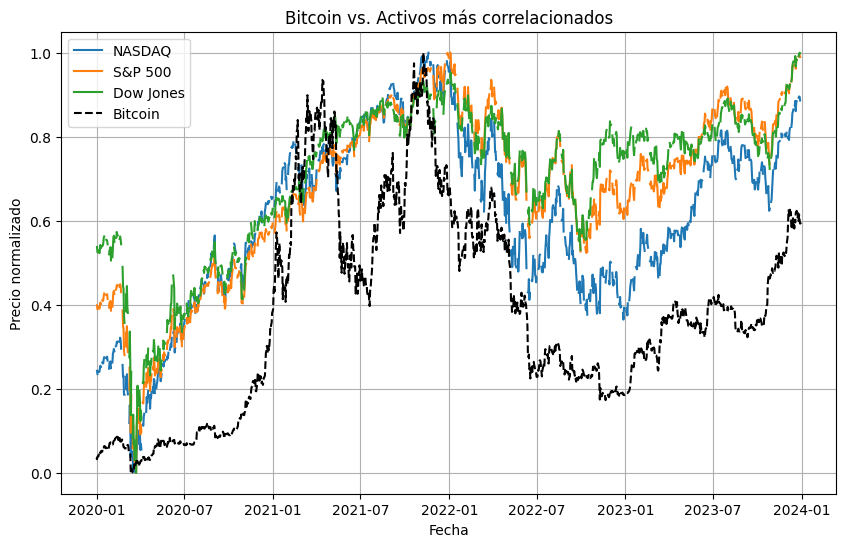

In [4]:
from sklearn.preprocessing import MinMaxScaler

# Ordenarlos de mayor a menor correlacion
bitcoin_correlations = correlation_matrix['Bitcoin'].sort_values(ascending=False)
activos_mas_correlacionados = bitcoin_correlations.index[1:4]

# Normalizar los precios
scaler = MinMaxScaler()
data_normalized = scaler.fit_transform(data2)

# Graficar los precios normalizados de Bitcoin y los activos más correlacionados
plt.figure(figsize=(10, 6))
for activo in activos_mas_correlacionados:
    plt.plot(data2.index, data_normalized[:, data2.columns.get_loc(activo)], label=activo)

plt.plot(data2.index, data_normalized[:, data2.columns.get_loc('Bitcoin')], label='Bitcoin', linestyle='--', color='black')
plt.title('Bitcoin vs. Activos más correlacionados')
plt.xlabel('Fecha')
plt.ylabel('Precio normalizado')
plt.legend()
plt.grid(True)
plt.show()

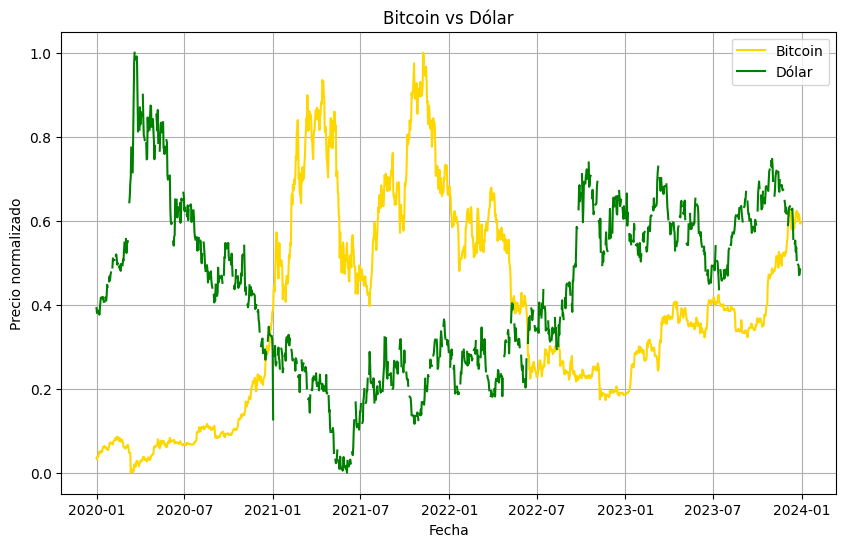

In [5]:
# Normalizar los precios de Bitcoin y el dólar
scaler = MinMaxScaler()
bitcoin_normalized = scaler.fit_transform(data2[['Bitcoin']])
dolar_normalized = scaler.fit_transform(data2[['Dolar']])

# Graficar los precios normalizados de Bitcoin y el dólar
plt.figure(figsize=(10, 6))
plt.plot(data2.index, bitcoin_normalized, label='Bitcoin', color='gold')
plt.plot(data2.index, dolar_normalized, label='Dólar', color='green')

plt.title('Bitcoin vs Dólar')
plt.xlabel('Fecha')
plt.ylabel('Precio normalizado')
plt.legend()
plt.grid(True)
plt.show()

In [6]:
# Elegir rango deseado para el modelo predictivo
ticker = 'BTC-USD'
start_date = '2015-01-01'
end_date = '2023-01-01'

# Descargar los datos
btc = yf.download(ticker, start=start_date, end=end_date)['Adj Close']

# Obtener el número de observaciones
num_observaciones = len(btc)
print("\nNúmero de observaciones en los datos:", num_observaciones)
# Imprimir el valor mínimo y máximo de la serie
print("Valor mínimo de la serie:", btc.min())
print("Valor máximo de la serie:", btc.max())

[*********************100%***********************]  1 of 1 completed


Número de observaciones en los datos: 2922
Valor mínimo de la serie: 178.10299682617188
Valor máximo de la serie: 67566.828125


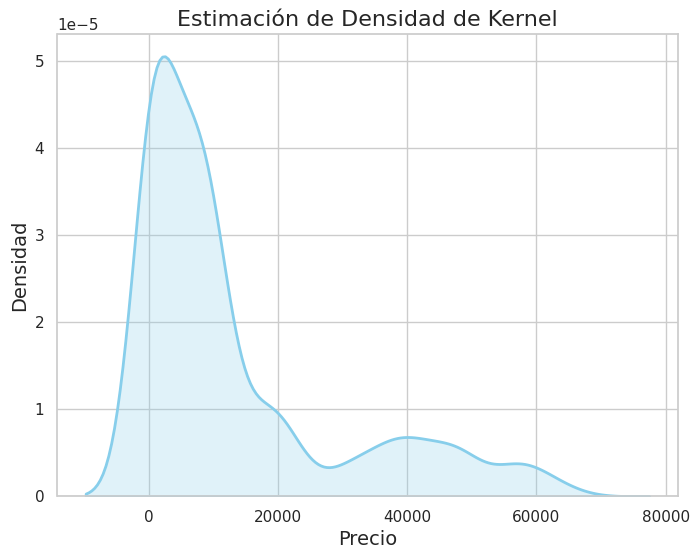

In [7]:
# Configurar estilo y tamaño del gráfico
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))

# Crear el gráfico de densidad de kernel
sns.kdeplot(btc, fill=True, color='skyblue', linewidth=2)

# Añadir título y etiquetas
plt.title('Estimación de Densidad de Kernel', fontsize=16)
plt.xlabel('Precio', fontsize=14)
plt.ylabel('Densidad', fontsize=14)

# Mostrar el gráfico
plt.show()

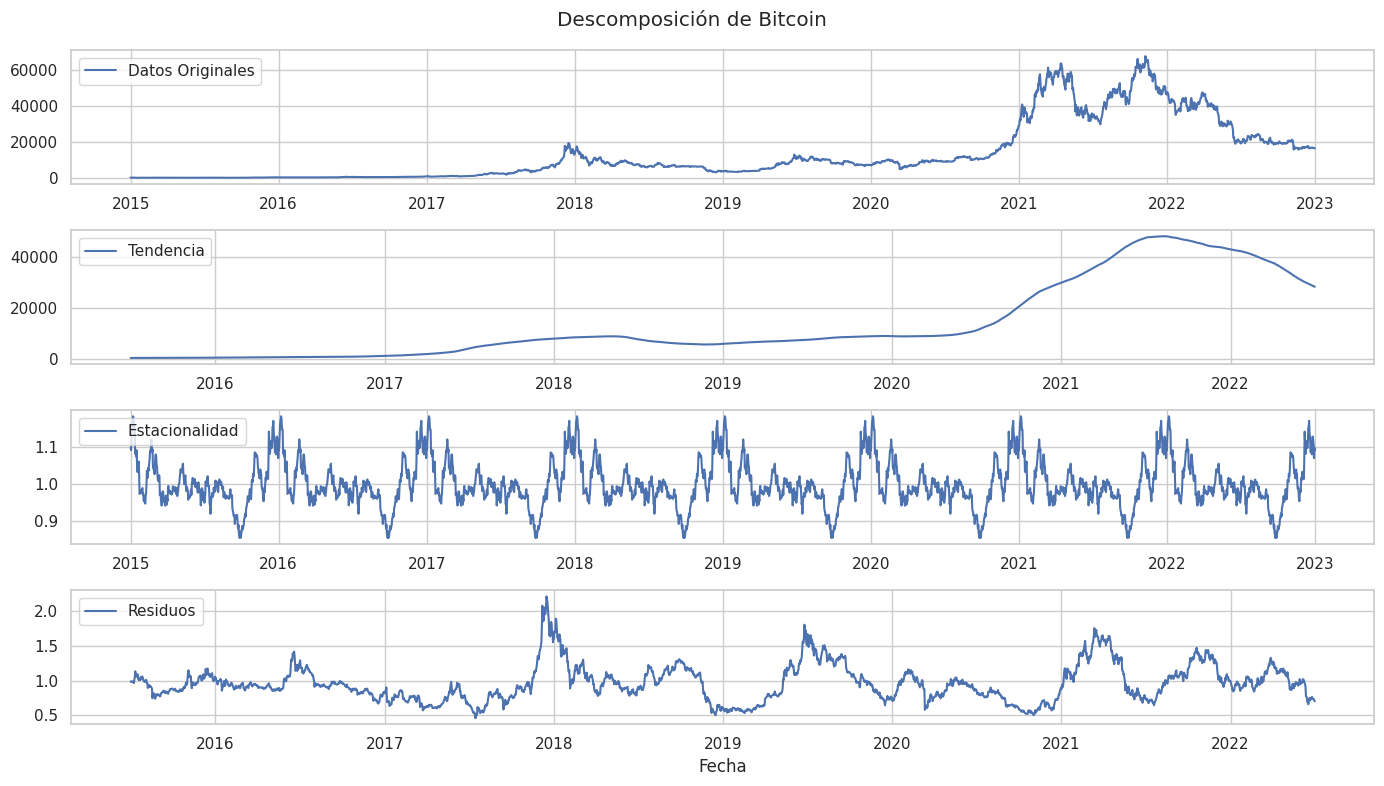

In [8]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Realizar descomposición estacional
decomposition = seasonal_decompose(btc, model='multiplicative', period=365)
seasonal = decomposition.seasonal

# Imprimir el gráfico de la descomposición estacional
plt.figure(figsize=(14, 8))
plt.subplot(4, 1, 1)
plt.plot(btc, label='Datos Originales')
plt.legend(loc='upper left')

plt.subplot(4, 1, 2)
plt.plot(decomposition.trend, label='Tendencia')
plt.legend(loc='upper left')

plt.subplot(4, 1, 3)
plt.plot(decomposition.seasonal, label='Estacionalidad')
plt.legend(loc='upper left')

plt.subplot(4, 1, 4)
plt.plot(decomposition.resid, label='Residuos')
plt.legend(loc='upper left')

plt.xlabel('Fecha')
plt.suptitle('Descomposición de Bitcoin')
plt.tight_layout()
plt.show()

In [9]:
print("Promedio de los residuos:",decomposition.resid.mean())

Promedio de los residuos: 0.9595907871187785


La media es: 0.001357002544736341
La desviación estándar es: 0.03883958727515876


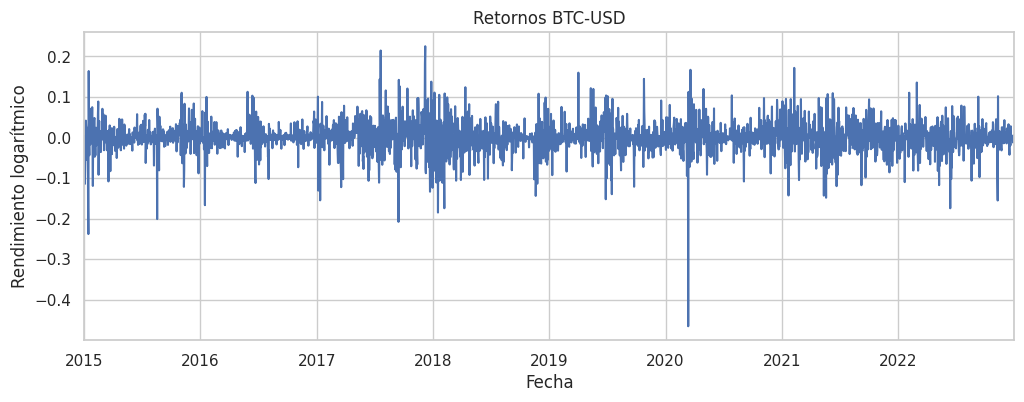

In [10]:
from scipy.stats import norm

# Calcular parámetros del modelo GBM
log_returns = np.log(1 + btc.pct_change())
mean_return = log_returns.mean()
std_deviation = log_returns.std()

print('La media es:', mean_return)
print("La desviación estándar es:", std_deviation)

# Graficar los rendimientos logarítmicos
plt.figure(figsize=(12, 4))
log_returns.plot()
plt.title('Retornos BTC-USD')
plt.xlabel('Fecha')
plt.ylabel('Rendimiento logarítmico')
plt.grid(True)
plt.show()


Resultados:
Precio medio esperado: 43373.799274972
Rango de precios probables: 2392.1763395361513 - 307877.9373331424
Intervalo de confianza del 95%: (41560.7487800982, 45186.8497698458)
Cambio Porcentual Pronosticado: 162.1169935876541


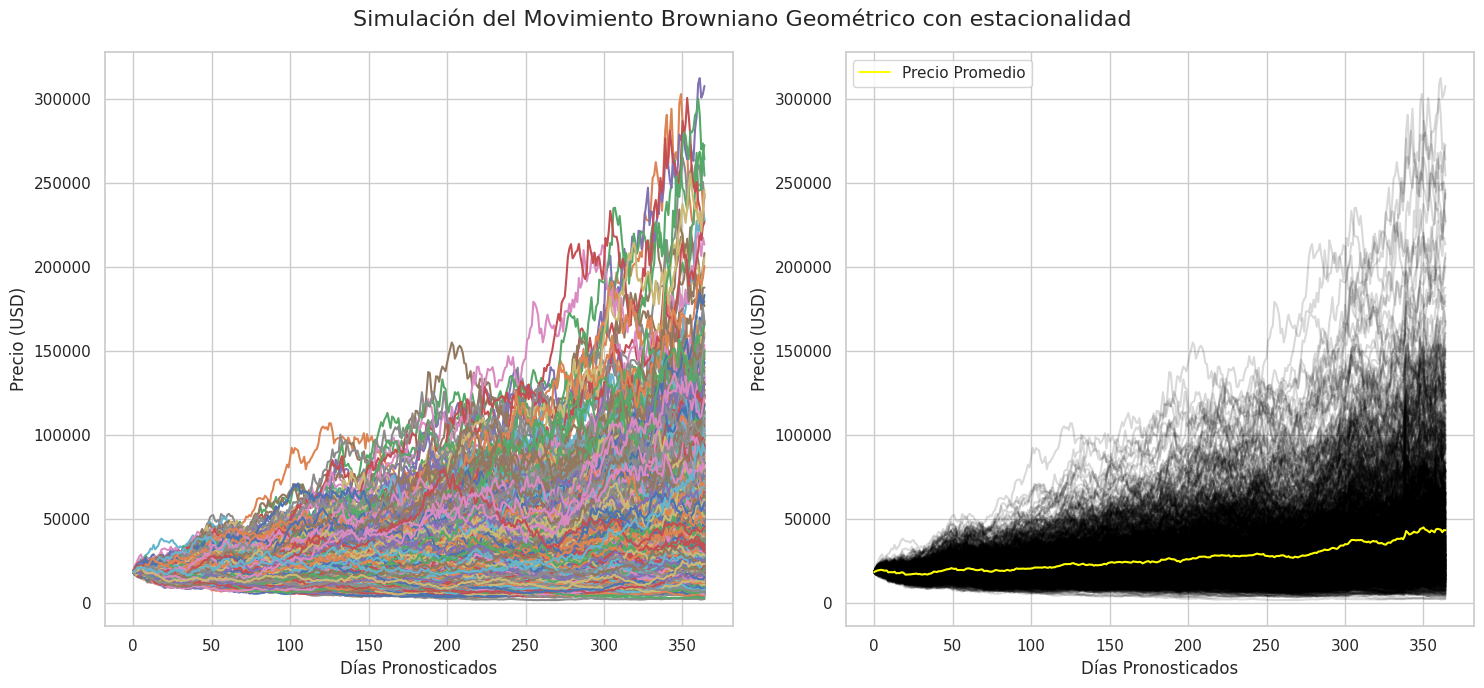

In [11]:
# Definir función para simular el modelo GBM con ajuste de deriva
def simulate_gbm(S0, mean, std_dev, n_simulations, simulation_days, drift_adjustment=0):
    dt = 1  # paso de tiempo es 1 día
    drift = mean - 0.5 * std_dev**2 + drift_adjustment
    prices = np.zeros((n_simulations, simulation_days))
    prices[:, 0] = S0
    for t in range(1, simulation_days):
        z = np.random.standard_normal(n_simulations)
        # Calcular el cambio en el precio en función del paso de tiempo
        prices[:, t] = prices[:, t-1] * np.exp((drift*dt) + (std_dev*dt*z))
    return prices

# Simular el modelo GBM con deriva ajustada
initial_price = btc.iloc[-1]
n_simulations = 1500
simulation_days = 365

# Incrementar el ajuste de deriva
drift_adjustment = 0.001

simulated_prices = simulate_gbm(initial_price, mean_return, std_deviation, n_simulations, simulation_days, drift_adjustment)

# Incorporar estacionalidad en la simulación
simulated_prices_with_seasonality = simulated_prices * seasonal[-simulation_days:].values.reshape(1, -1)

# Análisis de resultados de GBM
mean_price = np.mean(simulated_prices_with_seasonality[:, -1])
min_price = np.min(simulated_prices_with_seasonality[:, -1])
max_price = np.max(simulated_prices_with_seasonality[:, -1])
std_price = np.std(simulated_prices_with_seasonality[:, -1])
confidence_interval = norm.interval(0.95, loc=mean_price, scale=std_price/np.sqrt(n_simulations))
percent_change = (mean_price - initial_price) / initial_price * 100

# Imprimir resultados
print("\nResultados:")
print("Precio medio esperado:", mean_price)
print("Rango de precios probables:", min_price, "-", max_price)
print("Intervalo de confianza del 95%:", confidence_interval)
print("Cambio Porcentual Pronosticado:", percent_change)

# Crear una figura y dos subgráficas en una fila
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))

# Gráfico 1
for i in range(n_simulations):
    ax1.plot(simulated_prices_with_seasonality[i])
ax1.set_xlabel('Días Pronosticados')
ax1.set_ylabel('Precio (USD)')

# Gráfico 2
for i in range(n_simulations):
    ax2.plot(simulated_prices_with_seasonality[i], color='black', alpha=0.15)
# Calcular la línea del precio pronosticado promedio
average_price = np.mean(simulated_prices_with_seasonality, axis=0)
ax2.plot(average_price, color='yellow', linewidth=1.5, label='Precio Promedio')
ax2.set_xlabel('Días Pronosticados')
ax2.set_ylabel('Precio (USD)')
ax2.legend()

# Agregar un título común para ambas subgráficas
plt.suptitle('Simulación del Movimiento Browniano Geométrico con estacionalidad', fontsize=16)

# Ajustar el espacio entre las subgráficas
plt.tight_layout()

plt.show()

In [12]:
# Calcular VaR
confidence_level = 0.05
simulated_final_prices = simulated_prices_with_seasonality[:, -1]
sorted_simulated_final_prices = np.sort(simulated_final_prices)
position = int(np.ceil(confidence_level * len(sorted_simulated_final_prices)))
var = -np.mean(sorted_simulated_final_prices[:position])

print("VaR (Valor en Riesgo) at 95% confidence level:", var)

VaR (Valor en Riesgo) at 95% confidence level: -7566.6757234774


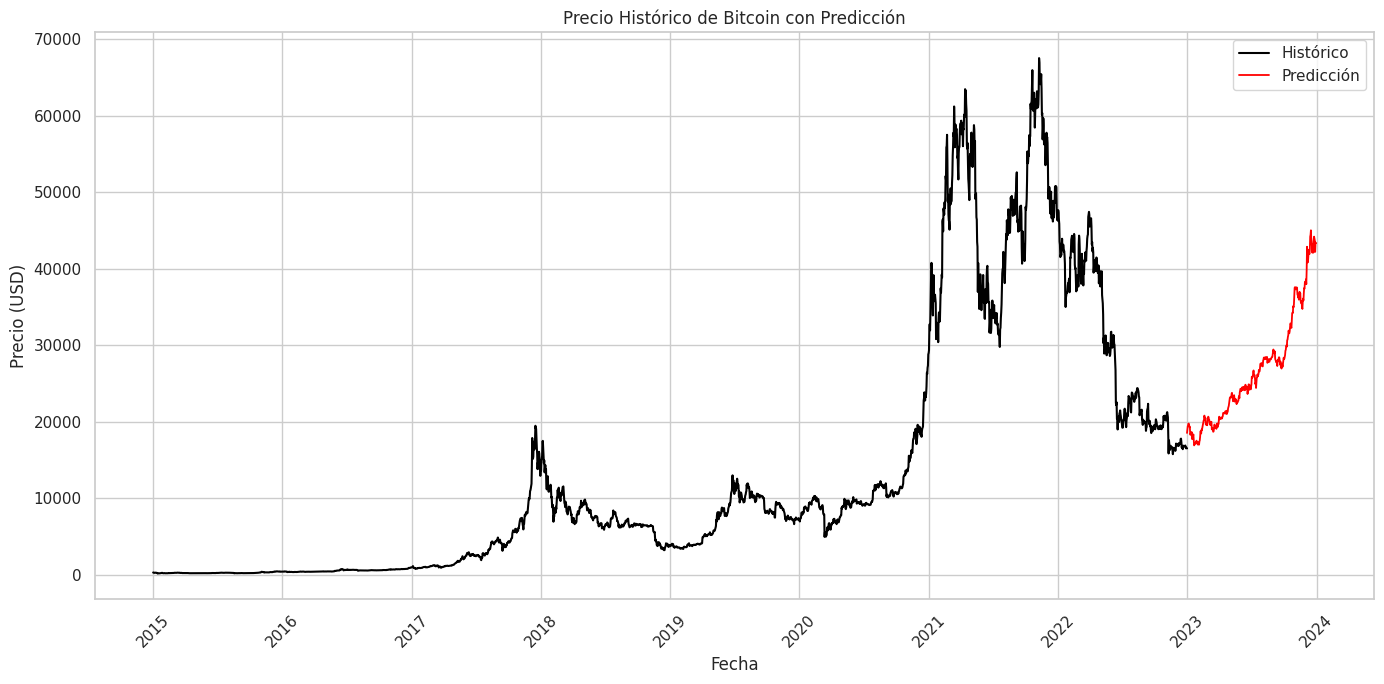

In [13]:
# Obtener las fechas para la predicción
fechas_prediccion = pd.date_range(start=btc.index[-1], periods=simulation_days, freq='D')

# Realizar la predicción del precio de Bitcoin utilizando el precio promedio simulado
precio_promedio_predicho = np.mean(simulated_prices_with_seasonality, axis=0)

# Crear una figura y un solo subgráfico
plt.figure(figsize=(14, 7))

# Graficar precios históricos de Bitcoin
plt.plot(btc, label='Histórico', color='black')

# Graficar el precio promedio de la predicción
plt.plot(fechas_prediccion, precio_promedio_predicho, label='Predicción', color='red', linewidth=1.3)

# Etiquetas y leyenda
plt.xlabel('Fecha')
plt.ylabel('Precio (USD)')
plt.title('Precio Histórico de Bitcoin con Predicción')
plt.legend()

# Rotar las etiquetas del eje x para una mejor visualización
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.grid(True)
plt.tight_layout()
plt.show()

[*********************100%***********************]  1 of 1 completed


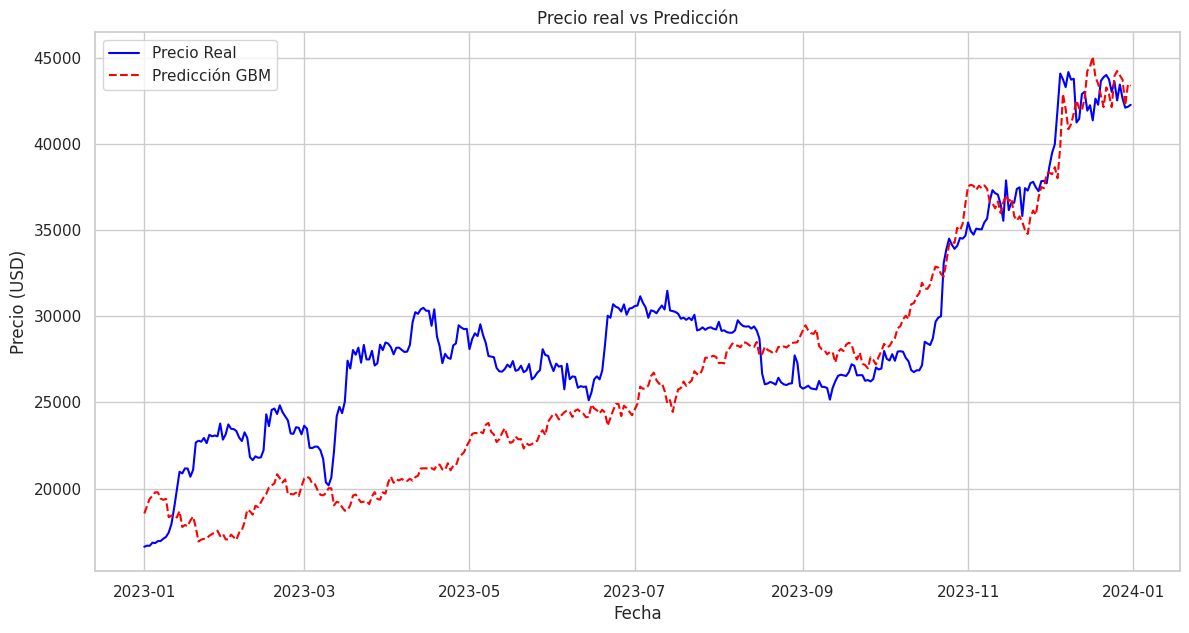

Error Cuadrático Medio (RMSE): 4154.248057354619
Error Porcentual Absoluto Medio (MAPE): 12.476275020886629
Porcentaje de efectividad: 87.52372497911337


In [14]:
# Descargar los datos reales de precios de Bitcoin para el período de predicción
start_prediction_date = '2023-01-01'
end_prediction_date = '2024-01-01'
real_prices_prediction_period = yf.download(ticker, start=start_prediction_date, end=end_prediction_date)['Adj Close']

# Calcular los precios predichos promediando los precios simulados con estacionalidad
predicted_prices = simulated_prices_with_seasonality.mean(axis=0)

# Extraer los precios reales de cierre ajustados de Bitcoin del DataFrame descargado
real_prices = real_prices_prediction_period.values

# Calcular estadísticas de evaluación
rmse = np.sqrt(((predicted_prices - real_prices) ** 2).mean())
mape = np.mean(np.abs((real_prices - predicted_prices) / real_prices)) * 100
efectividad = 100 - mape

# Graficar la predicción junto con los precios reales
plt.figure(figsize=(14, 7))
plt.plot(real_prices_prediction_period.index, real_prices, label='Precio Real', color='blue')
plt.plot(real_prices_prediction_period.index, predicted_prices, label='Predicción GBM', color='red', linestyle='--')
plt.xlabel('Fecha')
plt.ylabel('Precio (USD)')
plt.title('Precio real vs Predicción')
plt.legend()
plt.grid(True)
plt.show()

# Imprimir las estadísticas de evaluación
print("Error Cuadrático Medio (RMSE):", rmse)
print("Error Porcentual Absoluto Medio (MAPE):", mape)
print("Porcentaje de efectividad:", efectividad)

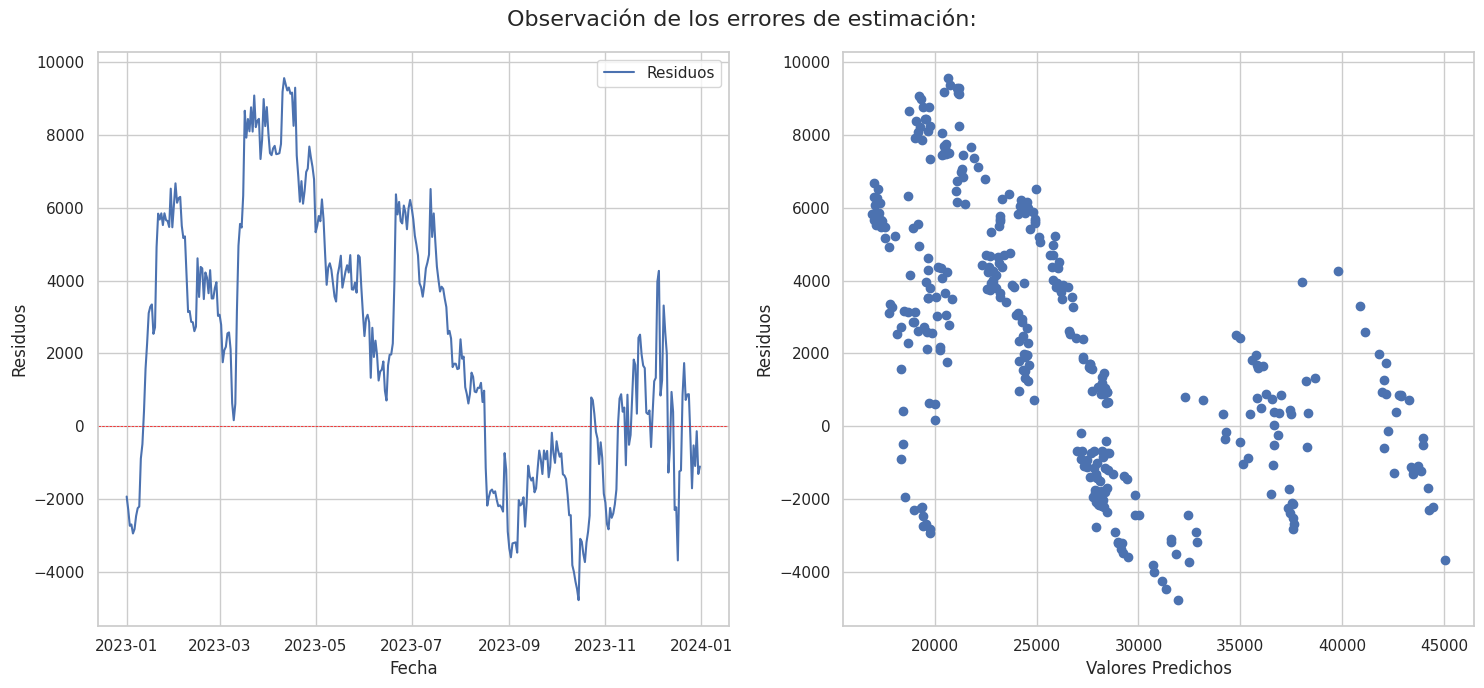

In [15]:
# Calcular los residuos
residuos = real_prices - predicted_prices

# Crear una figura y dos subgráficas en una fila
fig, axs = plt.subplots(1, 2, figsize=(15, 7))

# Gráfico de residuos
axs[0].plot(real_prices_prediction_period.index, residuos, label='Residuos')
axs[0].axhline(y=0, color='red', linestyle='--', linewidth=0.5)
axs[0].set_xlabel('Fecha')
axs[0].set_ylabel('Residuos')
axs[0].legend()
axs[0].grid(True)

# Gráfico de dispersión de los residuos
axs[1].scatter(predicted_prices, residuos)
axs[1].set_xlabel('Valores Predichos')
axs[1].set_ylabel('Residuos')
axs[1].grid(True)

# Agregar un título común para ambas subgráficas
plt.suptitle('Observación de los errores de estimación:', fontsize=16)

# Ajustar el espacio entre las subgráficas
plt.tight_layout()

plt.show()